In [93]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import random as rd

In [94]:
#salju_test = pd.read_csv('salju_test.csv')
salju_train = pd.read_csv('salju_train.csv')

In [95]:
salju_train

,id,Tanggal,KodeLokasi,SuhuMin,SuhuMax,Hujan,Penguapan,SinarMatahari,ArahAnginTerkencang,KecepatanAnginTerkencang,ArahAngin9am,ArahAngin3pm,KecepatanAngin9am,KecepatanAngin3pm,Kelembaban9am,Kelembaban3pm,Tekanan9am,Tekanan3pm,Awan9am,Awan3pm,Suhu9am,Suhu3pm,BersaljuHariIni,BersaljuBesok
0,1,01/06/2014,C4,10.4,15.5,4.8,NaN,NaN,WSW,24.0,NaN,WSW,0.0,13.0,78.0,76.0,1020.1,1018.5,NaN,NaN,13.1,15.0,Ya,Tidak
1,2,15/07/2014,C10,9.0,17.0,8.0,2.6,7.4,NaN,NaN,SW,WNW,13.0,20.0,80.0,61.0,1015.2,1014.6,7.0,5.0,11.9,15.5,Ya,Ya
2,3,16/02/2011,C46,18.2,32.0,0.0,NaN,NaN,ESE,44.0,SE,SE,15.0,26.0,62.0,42.0,NaN,NaN,NaN,NaN,23.8,29.6,Tidak,Tidak
3,4,08/08/2012,C36,7.3,24.5,0.0,8.4,10.4,SSW,54.0,N,SW,13.0,19.0,25.0,17.0,1019.2,1016.9,1.0,7.0,15.3,23.2,Tidak,Tidak
4,5,29/10/2016,C7,5.9,20.3,0.0,3.6,12.6,N,37.0,NNW,ESE,22.0,19.0,55.0,48.0,1019.7,1014.7,2.0,6.0,12.4,18.1,Tidak,Tidak
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
109090,109091,31/01/2009,C38,20.1,23.7,0.0,7.2,8.9,ESE,43.0,SE,ESE,24.0,26.0,74.0,70.0,1019.3,1017.6,4.0,6.0,22.0,22.1,Tidak,Ya
109091,109092,03/11/2010,C16,15.7,25.2,0.0,NaN,NaN,SSE,37.0,SSE,E,28.0,19.0,52.0,52.0,1018.4,1016.2,NaN,NaN,23.8,24.4,Tidak,Ya
109092,109093,11/11/2010,C17,7.5,20.4,1.6,NaN,NaN,NW,33.0,N,NW,4.0,13.0,92.0,51.0,1014.5,1010.6,NaN,NaN,12.6,19.8,Ya,Tidak
109093,109094,16/04/2012,C11,10.8,29.8,0.0,7.8,11.2,E,48.0,ESE,SE,13.0,26.0,35.0,18.0,1020.0,1015.8,0.0,1.0,21.7,29.2,Tidak,Tidak


In [96]:
#salju_test.head()

# **Masalah: Mengelompokkan data-data dalam berbagai cluster**

### **1. Melakukan eksplorasi data untuk menemukan atribut yang berpengaruh**


In [97]:
salju_train.isnull().sum()

id                              0
Tanggal                         0
KodeLokasi                      0
SuhuMin                      1122
SuhuMax                       929
Hujan                        2431
Penguapan                   47024
SinarMatahari               52379
ArahAnginTerkencang          7744
KecepatanAnginTerkencang     7696
ArahAngin9am                 7923
ArahAngin3pm                 3197
KecepatanAngin9am            1353
KecepatanAngin3pm            2303
Kelembaban9am                2002
Kelembaban3pm                3374
Tekanan9am                  11327
Tekanan3pm                  11308
Awan9am                     41844
Awan3pm                     44471
Suhu9am                      1340
Suhu3pm                      2698
BersaljuHariIni              2431
BersaljuBesok                2431
dtype: int64

Hasil di atas menunjukkan masih banyak data null/Nan di dataset salju_train.

In [98]:
salju_train.shape

(109095, 24)

Data dari salju_train mengandung 24 kolom dan 109095 baris

In [99]:
#Kolomnya ada apa saja
salju_train.columns

Index(['id', 'Tanggal', 'KodeLokasi', 'SuhuMin', 'SuhuMax', 'Hujan',
       'Penguapan', 'SinarMatahari', 'ArahAnginTerkencang',
       'KecepatanAnginTerkencang', 'ArahAngin9am', 'ArahAngin3pm',
       'KecepatanAngin9am', 'KecepatanAngin3pm', 'Kelembaban9am',
       'Kelembaban3pm', 'Tekanan9am', 'Tekanan3pm', 'Awan9am', 'Awan3pm',
       'Suhu9am', 'Suhu3pm', 'BersaljuHariIni', 'BersaljuBesok'],
      dtype='object')

In [100]:
#Setiap kolom bertipe apa
salju_train.dtypes

id                            int64
Tanggal                      object
KodeLokasi                   object
SuhuMin                     float64
SuhuMax                     float64
Hujan                       float64
Penguapan                   float64
SinarMatahari               float64
ArahAnginTerkencang          object
KecepatanAnginTerkencang    float64
ArahAngin9am                 object
ArahAngin3pm                 object
KecepatanAngin9am           float64
KecepatanAngin3pm           float64
Kelembaban9am               float64
Kelembaban3pm               float64
Tekanan9am                  float64
Tekanan3pm                  float64
Awan9am                     float64
Awan3pm                     float64
Suhu9am                     float64
Suhu3pm                     float64
BersaljuHariIni              object
BersaljuBesok                object
dtype: object

**NOTE:** Ada beberapa atribut yang bertipe non-numerik sehingga harus diubah menjadi tipe numerik agar dapat diproses

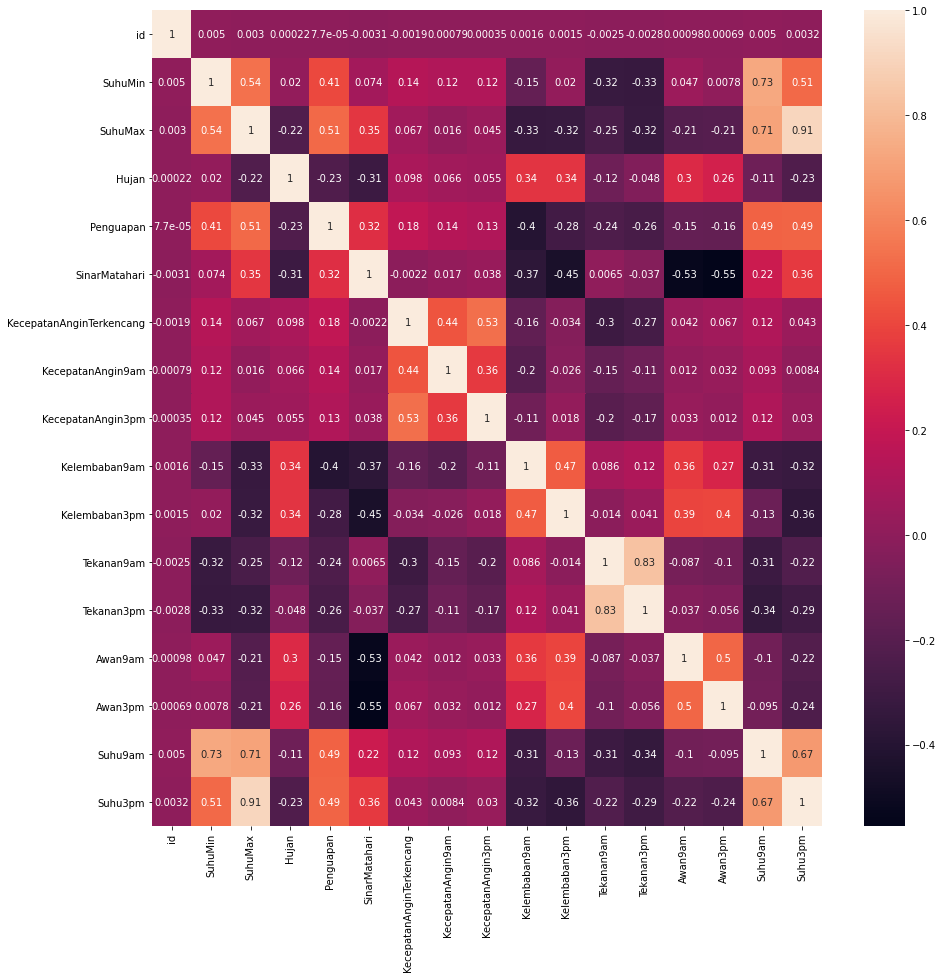

In [101]:
plt.figure(figsize=(15,15))
korelasi = salju_train.corr(method='kendall')
sns.heatmap(korelasi, annot=True)
plt.show()

Dengan menggunakan heatmap, bisa dilihat atribut mana saja yang mempunyai korelasi yang baik (yang mendekati 1). 
(**NOTE: atribut yang bertipe object tidak ada di heatmap**). 

Berdasarkan hasil heatmap di atas, atribut atau feature yang mempunyai korelasi yang tinggi ada di Suhu9am-SuhuMin, Suhu9am-SuhuMax, Suhu3pm-SuhuMax, dan Tekanan9am-Tekanan3pm. 

In [102]:
#fungsi correlation
def correlation(dataset, threshold):
  col_corr = set()
  corr_matrix = dataset.corr()
  for i in range(len(corr_matrix.columns)):
    for j in range(i):
      if (corr_matrix.iloc[i, j]) > threshold:
         colname = corr_matrix.columns[i]
         col_corr.add(colname)
  return col_corr

In [103]:
corr_feature = correlation(salju_train, 0.7)
len(set(corr_feature))

4

In [104]:
corr_feature

{'Suhu3pm', 'Suhu9am', 'SuhuMax', 'Tekanan3pm'}

Jika menggunakan fungsi correlation, atribut atau feature yang mempunyai korelasi yang tinggi (kasus ini adalah >0.7) ada 4 yaitu **Suhu3pm, Suhu9am, SuhuMax,** dan **Tekanan 3pm**. 4 atribut tersebut akan dipakai untuk feature selection dan modelling.

In [105]:
high_cor = ['Suhu3pm','Suhu9am','SuhuMax','Tekanan3pm']
dataset = salju_train[high_cor]
dataset.to_csv('dataset_baru.csv')

In [106]:
dataset

,Suhu3pm,Suhu9am,SuhuMax,Tekanan3pm
0,15.0,13.1,15.5,1018.5
1,15.5,11.9,17.0,1014.6
2,29.6,23.8,32.0,NaN
3,23.2,15.3,24.5,1016.9
4,18.1,12.4,20.3,1014.7
...,...,...,...,...
109090,22.1,22.0,23.7,1017.6
109091,24.4,23.8,25.2,1016.2
109092,19.8,12.6,20.4,1010.6
109093,29.2,21.7,29.8,1015.8


### 2. Pre-Processing

1. Mengecek dan mengatasi data yang terduplicate
2. Mengecek dan mengatasi missing value
3. Mengecek dan mengatasi data outlier
4. Feature scaling
5. PCA

In [107]:
#melihat jika ada data yang duplicate
dataset.duplicated().sum()

786

Terdapat 786 data yang duplicate. Karena jumlahnya yang jauh lebih sedikit dari dataset awal yang berjumlah 109095, maka data yang terduplikasi akan didrop

In [108]:
dataset = dataset.drop_duplicates()
dataset

,Suhu3pm,Suhu9am,SuhuMax,Tekanan3pm
0,15.0,13.1,15.5,1018.5
1,15.5,11.9,17.0,1014.6
2,29.6,23.8,32.0,NaN
3,23.2,15.3,24.5,1016.9
4,18.1,12.4,20.3,1014.7
...,...,...,...,...
109090,22.1,22.0,23.7,1017.6
109091,24.4,23.8,25.2,1016.2
109092,19.8,12.6,20.4,1010.6
109093,29.2,21.7,29.8,1015.8


In [109]:
#Selanjutnya melihat jika ada data null
dataset.isnull().sum()

Suhu3pm        2013
Suhu9am         695
SuhuMax         327
Tekanan3pm    10561
dtype: int64

Bisa dilihat bahwa ada banyak data null. Maka dari itu, akan dilakukannya pengubahan dari data null menjadi nilai hasil mean atau median dari seluruh dataset di setiap atribut. Dataset yang null tidak akan didrop karena takut hasilnya mempengaruhi model ML.

Untuk menentukan cara mana yang cocok ketika mengubah data-data null tersebut, dataset harus diketahui apakah dataset tersebut skewed atau tidak. Skewness merupakan teknik pengukuran apabila distribusi tiap data simetrik atau tidak. Jika rentan nilai skewness berada di antara 2 dan -2, maka dipakailah mean. Jika tidak, dipakailah median

In [110]:
#melihat apakah data tersebut skew
dataset.skew(axis=0, skipna=True)

Suhu3pm       0.237882
Suhu9am       0.085057
SuhuMax       0.223099
Tekanan3pm   -0.049346
dtype: float64

Berdasarkan hasil skewness dari atas, karena hasil rentannya masih di dalam 2 dan -2, maka metode yang akan dipakai adalah mean

In [111]:
dataset.fillna(dataset.mean(), inplace=True)

/usr/local/lib/python3.7/dist-packages/pandas/core/series.py:4536: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  downcast=downcast,


In [112]:
#cek apabila ada data null
dataset.isnull().sum()

Suhu3pm       0
Suhu9am       0
SuhuMax       0
Tekanan3pm    0
dtype: int64

In [113]:
dataset.describe

<bound method NDFrame.describe of         Suhu3pm  Suhu9am  SuhuMax   Tekanan3pm
0          15.0     13.1     15.5  1018.500000
1          15.5     11.9     17.0  1014.600000
2          29.6     23.8     32.0  1015.253036
3          23.2     15.3     24.5  1016.900000
4          18.1     12.4     20.3  1014.700000
...         ...      ...      ...          ...
109090     22.1     22.0     23.7  1017.600000
109091     24.4     23.8     25.2  1016.200000
109092     19.8     12.6     20.4  1010.600000
109093     29.2     21.7     29.8  1015.800000
109094     23.3     20.4     27.4  1005.400000

[108309 rows x 4 columns]>

Selanjutnya, pengecekan adanya data outlier akan dilakukan dengan metode IQR

In [114]:
#mengecek outlier dengan kalkulasi IQR

#score IQR
q1 = dataset.quantile(0.25)
q3 = dataset.quantile(0.75)
iqr = q3 - q1
iqr

Suhu3pm        9.6
Suhu9am        9.2
SuhuMax       10.3
Tekanan3pm     8.4
dtype: float64

In [115]:
(dataset < (q1-1.5*iqr)) | (dataset > (q3+1.5*iqr))

,Suhu3pm,Suhu9am,SuhuMax,Tekanan3pm
0,False,False,False,False
1,False,False,False,False
2,False,False,False,False
3,False,False,False,False
4,False,False,False,False
...,...,...,...,...
109090,False,False,False,False
109091,False,False,False,False
109092,False,False,False,False
109093,False,False,False,False


Jika ada data yang diberi label 'True', data tersebut merupakan data outlier dan jika diberi label 'False', data tersebut valid/bukan outlier. Setelah mengecek adanya data outlier, maka data outlier tersebut harus diuruskan.

In [116]:
#cara mengatasi data outlier
dataset = dataset[~((dataset < (q1-1.5*iqr)) | (dataset > (q3+1.5*iqr))).any(axis=1)]

In [117]:
dataset.shape

(105784, 4)

In [118]:
(dataset < (q1-1.5*iqr)) | (dataset > (q3+1.5*iqr))

,Suhu3pm,Suhu9am,SuhuMax,Tekanan3pm
0,False,False,False,False
1,False,False,False,False
2,False,False,False,False
3,False,False,False,False
4,False,False,False,False
...,...,...,...,...
109090,False,False,False,False
109091,False,False,False,False
109092,False,False,False,False
109093,False,False,False,False


Setelah data outlier sudah diurus, bisa keliatan baris dataset menjadi 105784 data. Bisa juga dilihat bahwa semua label adalah 'False' dimana dataset tidak ada lagi outlier.

Langkah selanjutnya di pre-processing adalah feature scalling. 

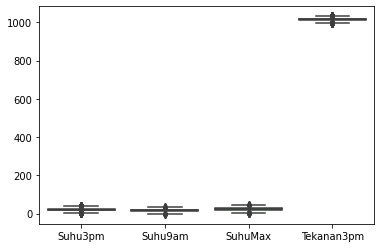

In [119]:
sns.boxplot(data=dataset)

Bisa terlihat bahwa data Tekanan3pm mempunyai rentan yang sangat jauh dari Suhu3pm, Suhu9pm, dan SuhuMax. Maka dari itu, dilakukannya feature scalling supaya semuat attribut mempunyai rentan yang sama. Metode feature scalling yang akan digunakan adalah **normalisasi**.

In [120]:
from sklearn.preprocessing import MinMaxScaler

scale = MinMaxScaler().fit_transform(dataset)
scale

array([[0.33072917, 0.39509537, 0.3163017 , 0.59701493],
       [0.34375   , 0.36239782, 0.35279805, 0.48059701],
       [0.7109375 , 0.6866485 , 0.71776156, 0.50009064],
       ...,
       [0.45572917, 0.38147139, 0.43552311, 0.36119403],
       [0.70052083, 0.62942779, 0.66423358, 0.51641791],
       [0.546875  , 0.59400545, 0.60583942, 0.20597015]])

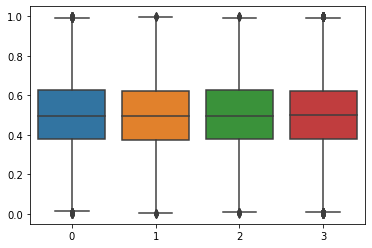

In [121]:
sns.boxplot(data=scale)

Hasil di atas menunjukkan bahwa semua data dari 4 atribut sudah berada di rentan yang sama sehingga mudah untuk pembuatan modeling.

Langkah terakhir adalah melakukan PCA untuk menentukan x dan y yang tepat dan pas

In [122]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
principalComponents = pca.fit_transform(scale)
datatrain_baru = pd.DataFrame(data=principalComponents, columns=['x','y'])
datatrain_baru

,x,y
0,-0.289163,0.022582
1,-0.235528,0.121873
2,0.320673,-0.131188
3,-0.007652,-0.053902
4,-0.150283,0.079151
...,...,...
105779,0.055283,-0.085892
105780,0.148933,-0.079870
105781,-0.075422,0.177788
105782,0.250046,-0.122653


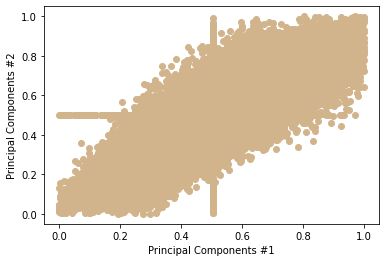

In [123]:
plt.scatter(scale[:,0], scale[:,1], c='tan')
plt.xlabel('Principal Components #1')
plt.ylabel('Principal Components #2')
plt.show()

### 3. Pemodelan: K-Means

Setelah melakukan data eksplorasi dan pre-processing, saatnya membuat model clustering. Pemodelan yang akan digunakan adalah K-Means.

In [124]:
X = datatrain_baru.iloc[:,[0,1]].values

In [125]:
X.shape

(105784, 2)

In [126]:
m = X.shape[0] #jumlah data/baris
n = X.shape[1] #jumlah feature/kolom

In [127]:
class Kmeans:
    def __init__(self,X,K):
        self.X = X
        self.Output = {}
        self.Centroids = np.array([]).reshape(self.X.shape[1],0)
        self.K = K
        self.m = self.X.shape[0]

    #mengatasi inisiasi/initialization random    
    def kmeanspp(self,X,K): 
        i = rd.randint(0,X.shape[0])
        Centroid_temp = np.array([X[i]])
        for k in range(1,K):
            D = np.array([]) 
            for x in X:
                D = np.append(D,np.min(np.sum((x-Centroid_temp)**2)))
            prob = D/np.sum(D)
            cummulative_prob = np.cumsum(prob)
            r = rd.random()
            i = 0
            for j,p in enumerate(cummulative_prob):
                if r<p:
                    i=j
                    break
            Centroid_temp = np.append(Centroid_temp,[X[i]],axis=0)
        return Centroid_temp.T
    
    def fit(self,n_iter):
        #menempatkan centroid secara acak
        self.Centroids = self.kmeanspp(self.X,self.K)
        
        #euclidian distances dan memberi kluster
        for n in range(n_iter):
            EuclidianDistance = np.array([]).reshape(self.m,0)
            for k in range(self.K):
                tempDist = np.sum((self.X-self.Centroids[:,k])**2,axis=1)
                EuclidianDistance = np.c_[EuclidianDistance,tempDist]
            C = np.argmin(EuclidianDistance,axis=1)+1
            
            #mengubah posisi centroid
            Y = {}
            for k in range(self.K):
                Y[k+1] = np.array([]).reshape(2,0)
            for i in range(self.m):
                Y[C[i]] = np.c_[Y[C[i]],self.X[i]]
        
            for k in range(self.K):
                Y[k+1] = Y[k+1].T
            for k in range(self.K):
                self.Centroids[:,k] = np.mean(Y[k+1],axis=0)
                
            self.Output = Y
            
    def predict(self):
        return self.Output,self.Centroids.T
    
    # Untuk Elbow Method
    def WCSS(self):
        wcss = 0
        for k in range(self.K):
            wcss+=np.sum((self.Output[k+1]-self.Centroids[:,k])**2)
        return wcss

In [128]:
#berapa kali iterasi
n_iteration = 50

#banyaknya clusters
K=3

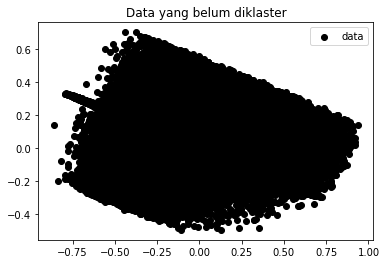

In [129]:
# Plot of the unclustered data

plt.scatter(X[:,0],X[:,1],c='black', label='data')
plt.legend()
plt.title('Data yang belum diklaster')
plt.show()

Graf di atas adalah hasil dari data yang belum menggunakan KMeans modelling.

In [130]:
kmeans = Kmeans(X,K)
kmeans.fit(n_iteration)
Output,Centroids = kmeans.predict()

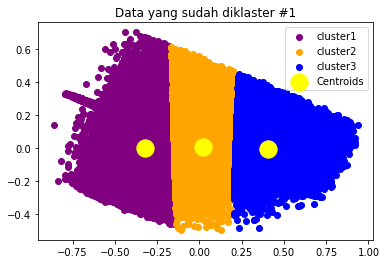

In [131]:
color = ['purple','orange','blue','red','green']
labels = ['cluster1','cluster2','cluster3','cluster4','cluster5']
for k in range(K):
    plt.scatter(Output[k+1][:,0],Output[k+1][:,1], c=color[k], label=labels[k])
plt.scatter(Centroids[:,0],Centroids[:,1], s=300, c='yellow', label='Centroids')
plt.title('Data yang sudah diklaster #1')
plt.legend()
plt.show()

Dan graf di atas merupakan hasil data yang sudah diclustering. Terdapat 3 Centroid dan 3 Clustering.

### 4. Evaluasi

Di tahap evaluasi ini, akan digunakannya the elbow method, atau juga yang bisa disebut WCSS, untuk mendapatkan jumlah kluster yang optimal.

In [132]:
WCSS_array=np.array([])
for K in range(1,11):
    kmeans=Kmeans(X,K)
    kmeans.fit(n_iteration)
    Output,Centroids=kmeans.predict()
    wcss=0
    for k in range(K):
        wcss+=np.sum((Output[k+1]-Centroids[k,:])**2)
    WCSS_array=np.append(WCSS_array,wcss)

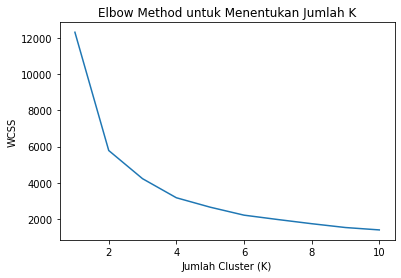

In [133]:
K_array=np.arange(1,11,1)
plt.plot(K_array,WCSS_array)
plt.xlabel('Jumlah Cluster (K)')
plt.ylabel('WCSS')
plt.title('Elbow Method untuk Menentukan Jumlah K')
plt.show()

Hasil graf di atas menunjukkan bahwa jumlah cluster yang paling optimal adalah sebanyak 2 cluster

### 5. Eksperimen

Di tahap eksperimen, pembagian data untuk tiap kluster akan di analisis, metode yang menggunakan elbow method dan metode yang tidak.

In [134]:
#berapa kali iterasi
n_iteration = 50

#banyaknya clusters
K=2

'''
class Kmeans:
    def __init__(self,X,K):
        self.X=X
        self.Output={}
        self.Centroids=np.array([]).reshape(self.X.shape[1],0)
        self.K=K
        self.m=self.X.shape[0]
        
    def kmeanspp(self,X,K): # This function is used to handle random initialization
        i=rd.randint(0,X.shape[0])
        Centroid_temp=np.array([X[i]])
        for k in range(1,K):
            D=np.array([]) 
            for x in X:
                D=np.append(D,np.min(np.sum((x-Centroid_temp)**2)))
            prob=D/np.sum(D)
            cummulative_prob=np.cumsum(prob)
            r=rd.random()
            i=0
            for j,p in enumerate(cummulative_prob):
                if r<p:
                    i=j
                    break
            Centroid_temp=np.append(Centroid_temp,[X[i]],axis=0)
        return Centroid_temp.T
    
    def fit(self,n_iter):
        #randomly Initialize the centroids
        self.Centroids=self.kmeanspp(self.X,self.K)
        
        """for i in range(self.K):
            rand=rd.randint(0,self.m-1)
            self.Centroids=np.c_[self.Centroids,self.X[rand]]"""
        
        #compute euclidian distances and assign clusters
        for n in range(n_iter):
            EuclidianDistance=np.array([]).reshape(self.m,0)
            for k in range(self.K):
                tempDist=np.sum((self.X-self.Centroids[:,k])**2,axis=1)
                EuclidianDistance=np.c_[EuclidianDistance,tempDist]
            C=np.argmin(EuclidianDistance,axis=1)+1
            #adjust the centroids
            Y={}
            for k in range(self.K):
                Y[k+1]=np.array([]).reshape(2,0)
            for i in range(self.m):
                Y[C[i]]=np.c_[Y[C[i]],self.X[i]]
        
            for k in range(self.K):
                Y[k+1]=Y[k+1].T
            for k in range(self.K):
                self.Centroids[:,k]=np.mean(Y[k+1],axis=0)
                
            self.Output=Y
            
    
    def predict(self):
        return self.Output,self.Centroids.T
    
    def WCSS(self):
        wcss=0
        for k in range(self.K):
            wcss+=np.sum((self.Output[k+1]-self.Centroids[:,k])**2)
        return wcss
''' 

'\nclass Kmeans:\n    def __init__(self,X,K):\n        self.X=X\n        self.Output={}\n        self.Centroids=np.array([]).reshape(self.X.shape[1],0)\n        self.K=K\n        self.m=self.X.shape[0]\n        \n    def kmeanspp(self,X,K): # This function is used to handle random initialization\n        i=rd.randint(0,X.shape[0])\n        Centroid_temp=np.array([X[i]])\n        for k in range(1,K):\n            D=np.array([]) \n            for x in X:\n                D=np.append(D,np.min(np.sum((x-Centroid_temp)**2)))\n            prob=D/np.sum(D)\n            cummulative_prob=np.cumsum(prob)\n            r=rd.random()\n            i=0\n            for j,p in enumerate(cummulative_prob):\n                if r<p:\n                    i=j\n                    break\n            Centroid_temp=np.append(Centroid_temp,[X[i]],axis=0)\n        return Centroid_temp.T\n    \n    def fit(self,n_iter):\n        #randomly Initialize the centroids\n        self.Centroids=self.kmeanspp(self.X,self

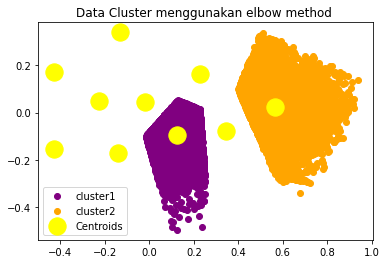

In [135]:
color=['purple','orange','blue','red','green']
labels=['cluster1','cluster2','cluster3','cluster4','cluster5']
for k in range(K):
    plt.scatter(Output[k+1][:,0],Output[k+1][:,1],c=color[k],label=labels[k])
plt.scatter(Centroids[:,0],Centroids[:,1],s=300,c='yellow',label='Centroids')
plt.title('Data Cluster menggunakan elbow method ')
plt.legend()
plt.show()

Jika dibandingkan graf dataset yang menggunakan elbow method dengan yang tidak, dapat dilihat bahwa clustering di graf yang menggunakan elbow method lebih mudah dicermati dan diklasifikasi.

### 5. Kesimpulan

Dari hasil pemodelan clustering di atas, dapat dibuktikan bahwa clustering dengan menggunakan WCSS atau The Elbow Method memberikan hasil yang lebih optimal, sehingga mudah untuk mengklasifikasi data test jika ingin membuat prediksi.

In [138]:
datatrain_baru.to_csv('datatrain_baru.csv')